In [2]:
import torch
import matplotlib.pyplot as plt
from useful_functions_notebook_14to18 import *
from useful_functions_notebook_8to13 import variable_consistancy_check, mass_not_preserved_percentage_decrease, check_branch_length, analyze_data
from IPython.display import display, HTML
from IPython.display import display
display(HTML("<style>.container { width:70% !important; }</style>"))
transform = transforms.Resize((29, 10))
original = torch.load('data/dataset_distlognorm_massnorm.pt')

# T = 100, epochs = 1000

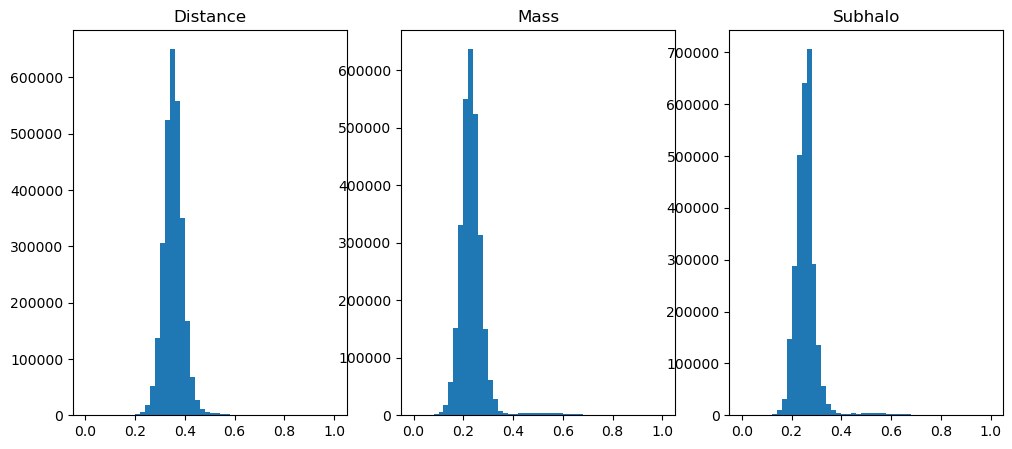

In [4]:

T100 = torch.load("../testing/T/generated_image_epochs=1000_BILINEAR_T=100_linear.pt", map_location = "cpu")
T100 = transform(T100.to(dtype=torch.float))
T100 = normalize(T100, True, [0, 1, 2])


dist = T100[:, 0]
mass = T100[:, 1]
subh = T100[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()


In [6]:
# dist
print("dist:")
lower_threshold = 0.55
upper_threshold = 0.6
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.4
upper_threshold = 0.45
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.39
upper_threshold = 0.43
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.8
upper_threshold = 0.999
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.55 and 0.6: 0.13%

mass:
Percentage of values between 0.4 and 0.45: 0.26%

subh:
Percentage of values between 0.39 and 0.43: 0.23%

Percentage of values between 0.8 and 0.999: 0.02%



In [7]:
T100 = transform_diffusion_image(T100, d_thresh = 0.55, m_tresh = 0.4, s_low = 0.4, s_high = 0.77)

T100_con, T100_incon = check_consistency(T100)



Percentage of consistant images = 1.99%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 28.28%
inconsistency due to distance not zero in main branch =  0.02%
inconsistency due to gap between branches =  81.68%
inconsistency due to zgap in branch 31.12%
inconsistency due to last descendant dont exist 64.75%

Number of images with two or more inconsistencies = 7523, which is  76.76%
That corresponds to 75.23% of all images


Of all images, 27.72% have zero inconsistency
Of all images, 0.02% have distance main branch inconsistency
Of all images, 80.05% have gap between branches inconsistency
Of all images, 30.50% have gap within branch inconsistency
Of all images, 63.46% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 53
perc of occurences where mass is not preserved = 10.69% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 53
perc of occurences where mass is not preserved = 10.69% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 37
perc of occurences where mass is not preserved = 7.46% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 30
perc of occurences where mass is not preserved = 6.05% vs. 0.32% in training data







DISTANCE:
total distance progentors = 11 
number of occurences where distance increase (not preserved) = 0
perc of occurences where mass increase (not preserved) = 0.00% vs. 49.67% in training data


total branches where the last halo distance to main branche is not the 

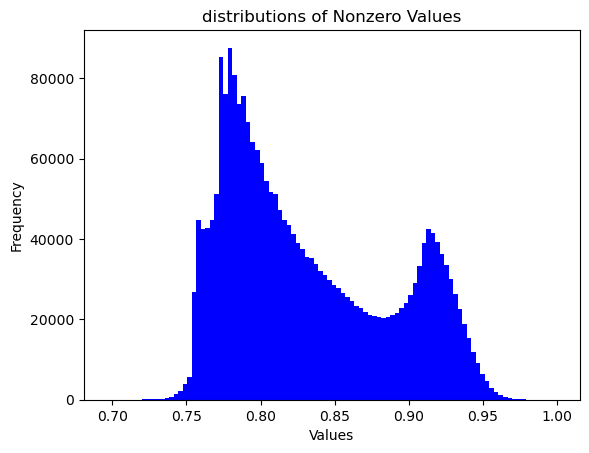

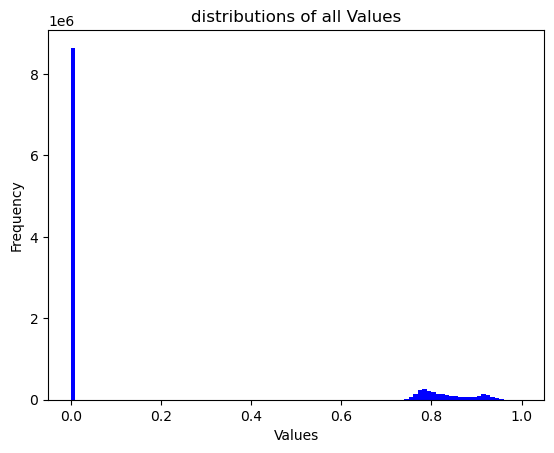

number of nonzero values = 2475374
Generated images:


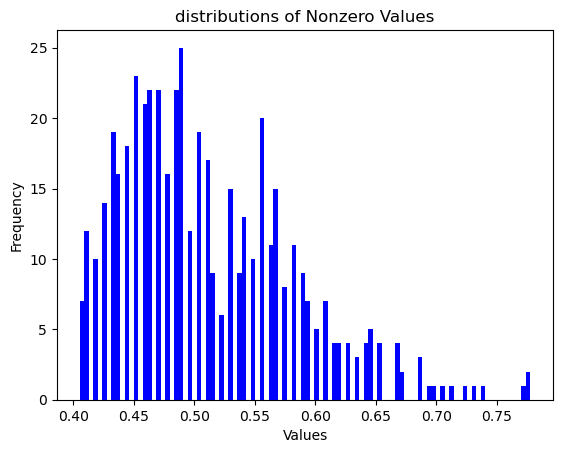

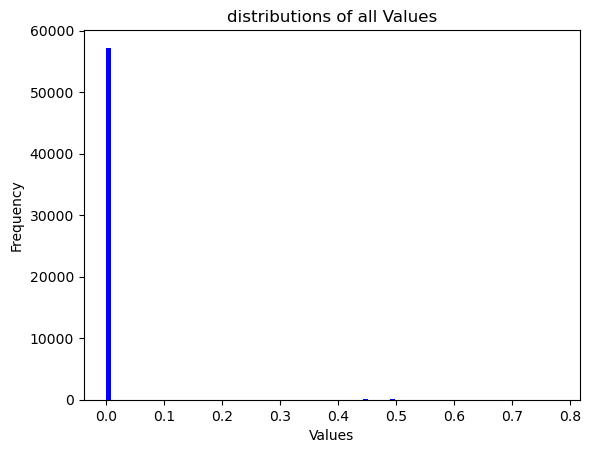

number of nonzero values = 497


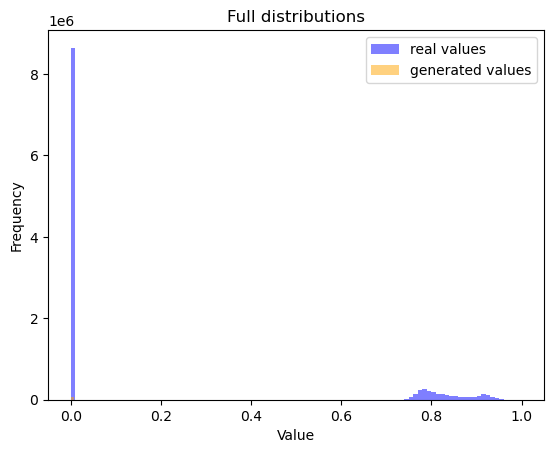

Full distribution:
KS Statistic: 0.2224818431293879
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0057:
The distributions are significantly different (reject H0), KS statistic 0.2225 > 0.0057


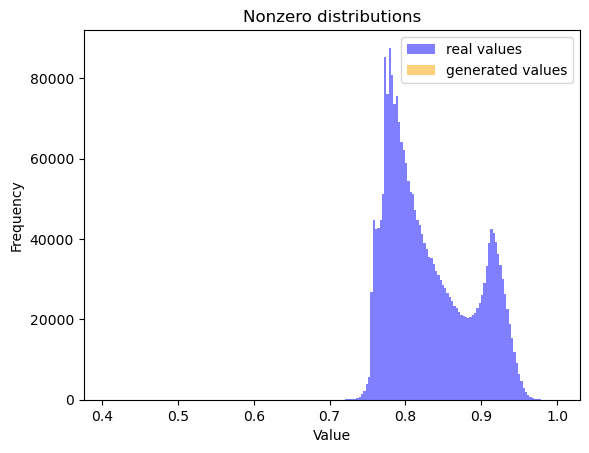

Nonzero distribution:
KS Statistic: 0.9935529356888158
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0609:
The distributions are significantly different (reject H0), KS statistic 0.9936 > 0.0609


(0.2224818431293879, 0.9935529356888158)

In [8]:
variable_consistancy_check(T100_con, False)
avg_branch = check_branch_length(T100_con)
ks_test(original, T100_con, dim = 1)

# T = 250, epochs = 1000

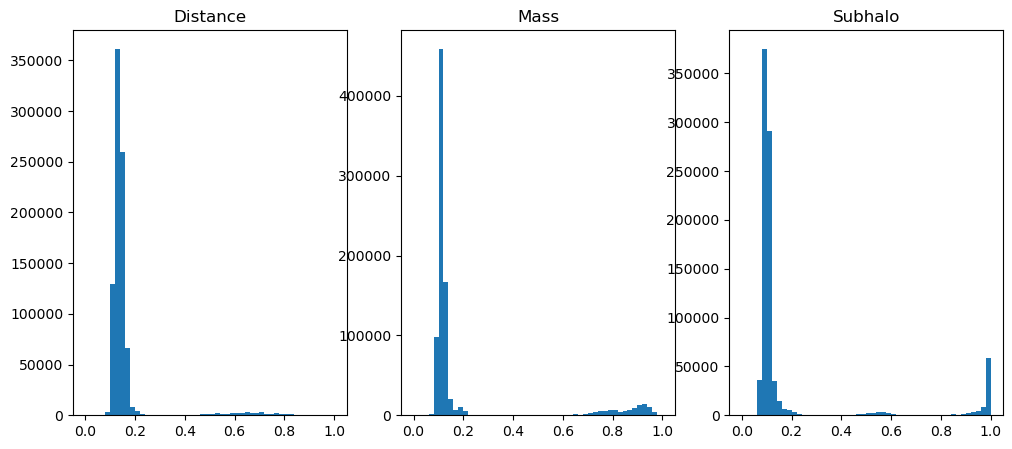

In [44]:

T250 = torch.load("../testing/T/generated_image_epochs=1000_BILINEAR_T=250_linear.pt", map_location = "cpu")
T250 = transform(T250.to(dtype=torch.float))
T250 = normalize(T250, True, [0, 1, 2])


dist = T250[:, 0]
mass = T250[:, 1]
subh = T250[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()


In [71]:
# dist
print("dist:")
lower_threshold = 0.25
upper_threshold = 0.45
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.3
upper_threshold = 0.59
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.3
upper_threshold = 0.4
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.7
upper_threshold = 0.75
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.25 and 0.45: 0.25%

mass:
Percentage of values between 0.3 and 0.59: 0.00%

subh:
Percentage of values between 0.3 and 0.4: 0.00%

Percentage of values between 0.7 and 0.75: 0.01%



In [72]:
T250 = transform_diffusion_image(T250, d_thresh = 0.3, m_tresh = 0.49, s_low = 0.4, s_high = 0.75)

T250_con, T250_incon = check_consistency(T250)



Percentage of consistant images = 80.43%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 1.53%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  57.41%
inconsistency due to zgap in branch 55.20%
inconsistency due to last descendant dont exist 1.02%

Number of images with two or more inconsistencies = 87, which is  14.82%
That corresponds to 2.90% of all images


Of all images, 0.30% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 11.23% have gap between branches inconsistency
Of all images, 10.80% have gap within branch inconsistency
Of all images, 0.20% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 22612
perc of occurences where mass is not preserved = 27.95% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 14844
perc of occurences where mass is not preserved = 18.34% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 3227
perc of occurences where mass is not preserved = 3.99% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 952
perc of occurences where mass is not preserved = 1.18% vs. 0.32% in training data







DISTANCE:
total distance progentors = 28671 
number of occurences where distance increase (not preserved) = 10048
perc of occurences where mass increase (not preserved) = 35.05% vs. 49.67% in training data


total branches where the last halo distance to main br

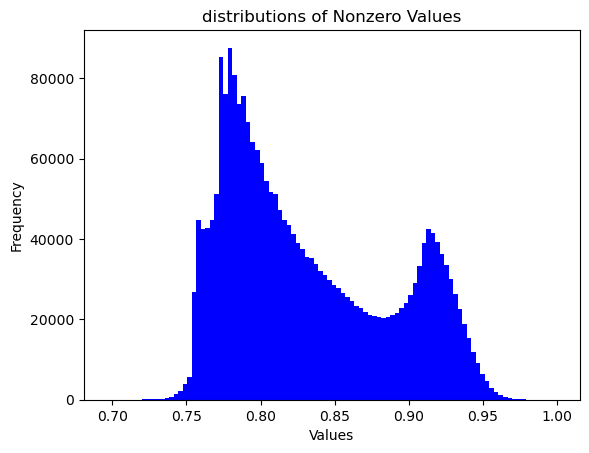

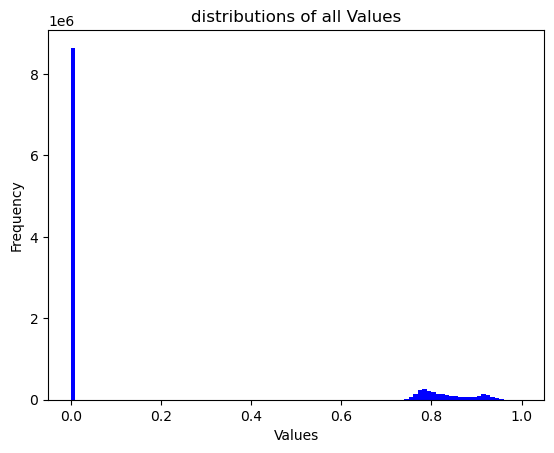

number of nonzero values = 2475374
Generated images:


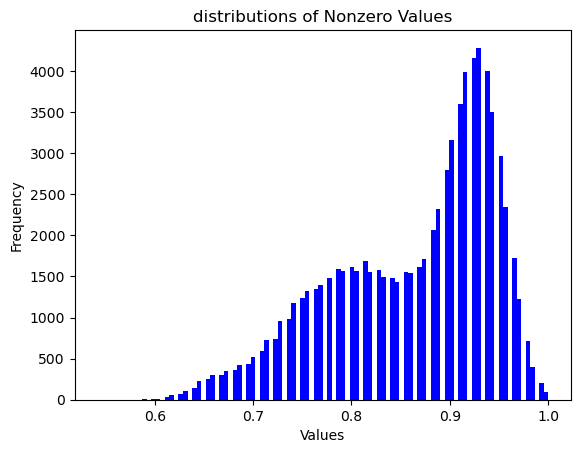

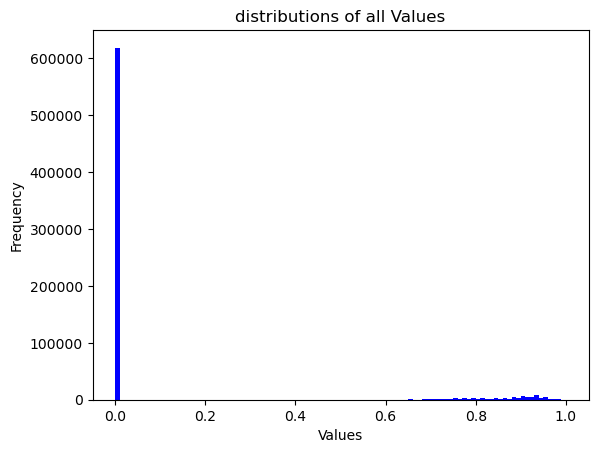

number of nonzero values = 81115


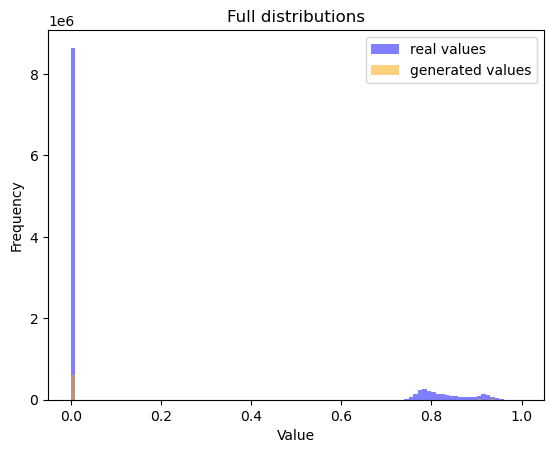

Full distribution:
KS Statistic: 0.12024042443461869
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0017:
The distributions are significantly different (reject H0), KS statistic 0.1202 > 0.0017


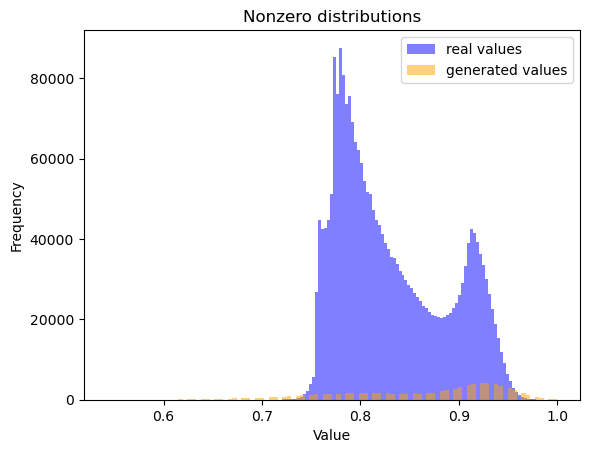

Nonzero distribution:
KS Statistic: 0.2965064821519062
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0048:
The distributions are significantly different (reject H0), KS statistic 0.2965 > 0.0048


(0.12024042443461869, 0.2965064821519062)

In [73]:
variable_consistancy_check(T250_con, False)
avg_branch = check_branch_length(T250_con)
ks_test(original, T250_con, dim = 1)

# T = 500, epochs = 500

/Users/corneliusbencsik/anaconda3/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


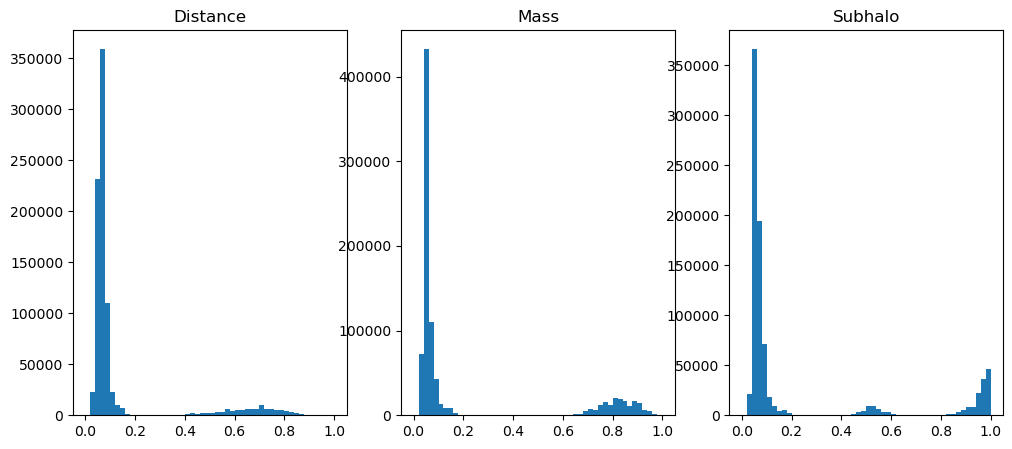

In [3]:

T500 = torch.load("../testing/test_other/generated_image_epochs=500_BILINEAR_T=500_linear.pt", map_location = "cpu")
T500 = transform(T500.to(dtype=torch.float))
T500 = normalize(T500, True, [0, 1, 2])


dist = T500[:, 0]
mass = T500[:, 1]
subh = T500[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()


In [41]:
# dist
print("dist:")
lower_threshold = 0.2
upper_threshold = 0.27
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.2
upper_threshold = 0.56
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.23
upper_threshold = 0.4
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.67
upper_threshold = 0.75
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.2 and 0.27: 0.01%

mass:
Percentage of values between 0.2 and 0.56: 0.00%

subh:
Percentage of values between 0.23 and 0.4: 0.01%

Percentage of values between 0.67 and 0.75: 0.01%



In [42]:
T500 = transform_diffusion_image(T500, d_thresh = 0.25, m_tresh = 0.56, s_low = 0.39, s_high = 0.7)

T500_con, T500_incon = check_consistency(T500)



Percentage of consistant images = 95.23%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 14.69%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  77.62%
inconsistency due to zgap in branch 18.18%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 15, which is  10.49%
That corresponds to 0.50% of all images


Of all images, 0.70% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 3.70% have gap between branches inconsistency
Of all images, 0.87% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 54447
perc of occurences where mass is not preserved = 32.65% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 36714
perc of occurences where mass is not preserved = 22.02% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 10778
perc of occurences where mass is not preserved = 6.46% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 4240
perc of occurences where mass is not preserved = 2.54% vs. 0.32% in training data







DISTANCE:
total distance progentors = 98555 
number of occurences where distance increase (not preserved) = 44031
perc of occurences where mass increase (not preserved) = 44.68% vs. 49.67% in training data


total branches where the last halo distance to main 

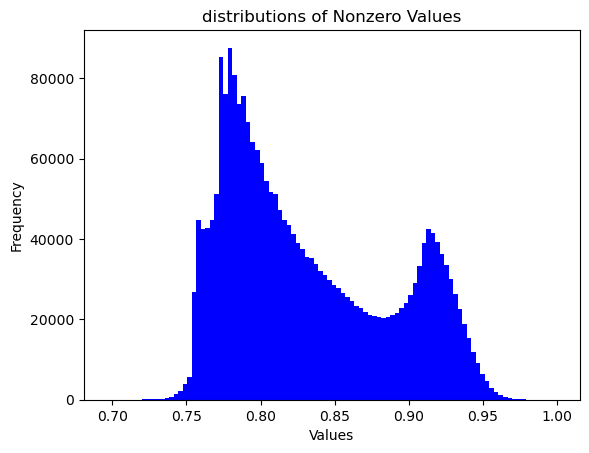

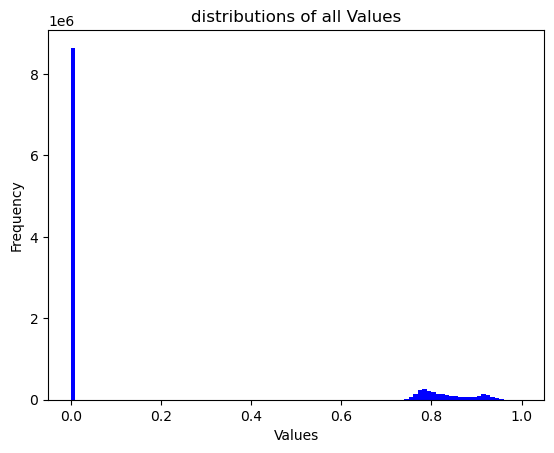

number of nonzero values = 2475374
Generated images:


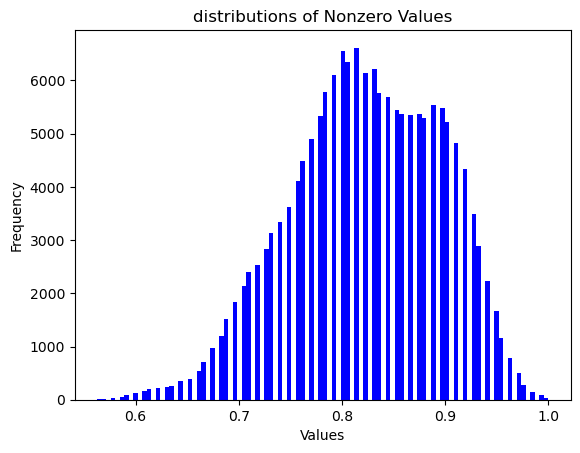

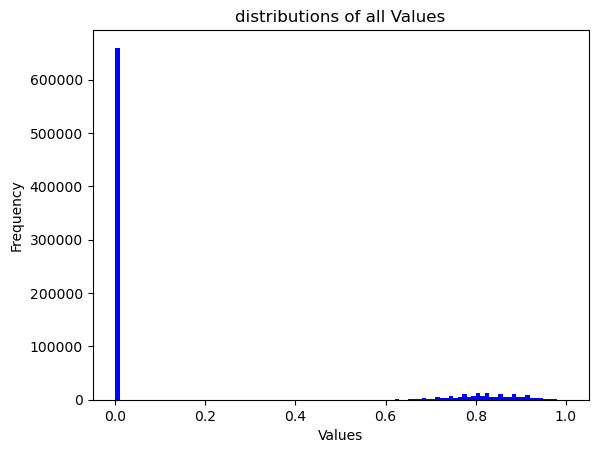

number of nonzero values = 168472


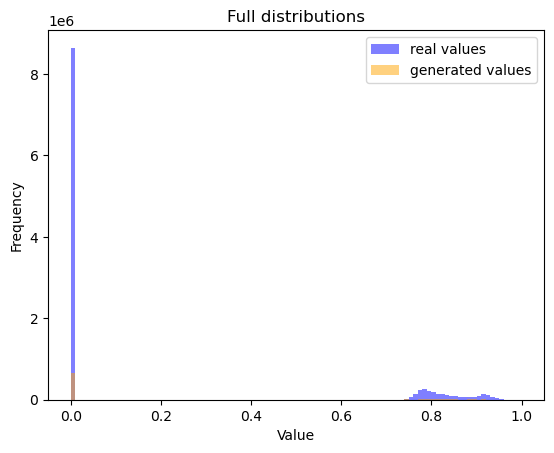

Full distribution:
KS Statistic: 0.055626035708794985
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0015:
The distributions are significantly different (reject H0), KS statistic 0.0556 > 0.0015


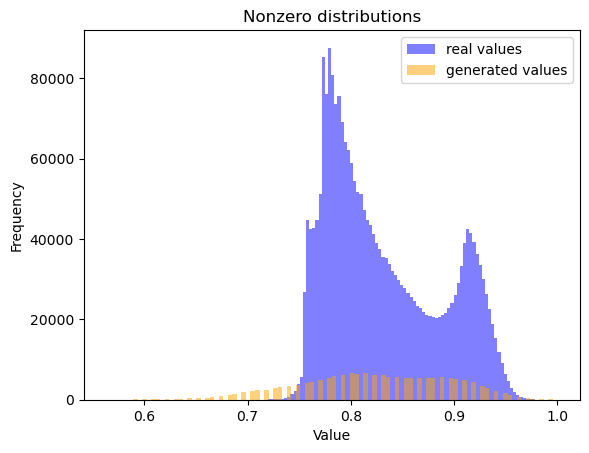

Nonzero distribution:
KS Statistic: 0.18039370240788338
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0034:
The distributions are significantly different (reject H0), KS statistic 0.1804 > 0.0034


(0.055626035708794985, 0.18039370240788338)

In [43]:
variable_consistancy_check(T500_con, False)
avg_branch = check_branch_length(T500_con)
ks_test(original, T500_con, dim = 1)